<a href="https://colab.research.google.com/github/ranjithrece/Spark/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Task 3**
## Built a Decision Tree & visualize it

In [94]:
# getting data
!wget -O /content/sample_data/iris.csv https://drive.google.com/u/0/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-&export=download

--2021-08-04 14:46:32--  https://drive.google.com/u/0/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-
Resolving drive.google.com (drive.google.com)... 172.217.9.206, 2607:f8b0:4004:806::200e
Connecting to drive.google.com (drive.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hq40k5sktieoir8p27pjk46hc1leqp5q/1628088375000/05764018061327881347/*/11Iq7YvbWZbt8VXjfm06brx66b10YiwK- [following]
--2021-08-04 14:46:32--  https://doc-10-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hq40k5sktieoir8p27pjk46hc1leqp5q/1628088375000/05764018061327881347/*/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-
Resolving doc-10-20-docs.googleusercontent.com (doc-10-20-docs.googleusercontent.com)... 142.250.188.33, 2607:f8b0:4004:835::2001
Connecting to doc-10-20-docs.googleusercontent.com (doc-10-20-docs.googleusercontent.com)|142.250.188.3

In [95]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [96]:
# reading data
df = pd.read_csv('/content/sample_data/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
df.drop('Id',axis =1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [99]:
X = df.drop('Species',axis=1)
y = df.Species
X.shape,y.shape

((150, 4), (150,))

In [100]:
y = pd.get_dummies(y,drop_first=True) #encoding label for better modeling
y.head()

,Iris-versicolor,Iris-virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [101]:
#spliting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state=0)

In [102]:
X_train.shape,X_test.shape

((112, 4), (38, 4))

##Model

In [103]:
#training the model
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(f'Train score : {tree.score(X_train,y_train)}')
print(f'Test score : {tree.score(X_test,y_test)}')

Train score : 1.0
Test score : 1.0



##Visualizing Decision Tree

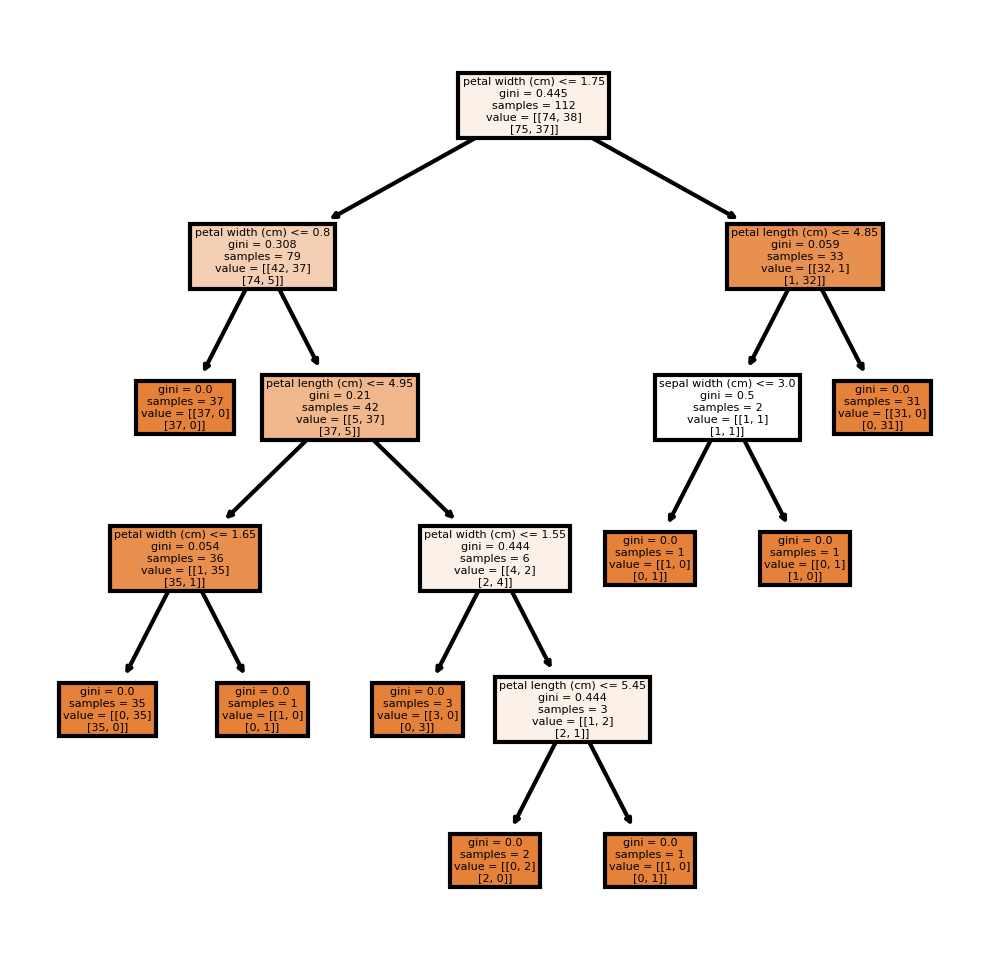

In [106]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')